## PROJECT 123

### PROJECT NAME: Sentiment Analysis On Iphone_4s

### GROUP NUMBER: 03

### TEAM MEMBERS: 

* Vrushabh dipak patil
* Harsh Suvarna
* Sourav Shivkumar Shukla
* Deepak Baliram Talekar
* Deepak C N
* Sowmiya S
* Krishna Prasad

### Import the Required Packages

In [6]:
import numpy as np
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt

# For regular expressions
import re

# For handling string
import string

# For performing mathematical operations
import math

#for natural language processing
import nltk

!pip install textblob

from textblob import TextBlob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [7]:
# Importing dataset
df=pd.read_csv('C:\\Users\HP\\Desktop\\iphone_4s_review.csv') 
print("Shape of data=>",df.shape)

Shape of data=> (50146, 2)


In [8]:
df

,Ratings,Reviews
0,5.0,These are still going strong after 3 months of...
1,5.0,Hey! you know that Chance scouted out the loca...
2,5.0,All moving pieces work as intended. The pieces...
3,3.0,This book made me want to read more. I loved ...
4,5.0,This book was so very excellent. To see what D...
...,...,...
50141,5.0,Absolutely brilliantREAD MORE
50142,5.0,"Superb phone. This is my 4th iPhone, I feel SE..."
50143,5.0,very niceREAD MORE
50144,5.0,Loving it as of now. Good Product .READ MORE


### Removing the Null and missing values

In [9]:
df.isnull().sum()

Ratings        1
Reviews    20474
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Ratings    0
Reviews    0
dtype: int64

In [12]:
df

,Ratings,Reviews
0,5.0,These are still going strong after 3 months of...
1,5.0,Hey! you know that Chance scouted out the loca...
2,5.0,All moving pieces work as intended. The pieces...
3,3.0,This book made me want to read more. I loved ...
4,5.0,This book was so very excellent. To see what D...
...,...,...
50141,5.0,Absolutely brilliantREAD MORE
50142,5.0,"Superb phone. This is my 4th iPhone, I feel SE..."
50143,5.0,very niceREAD MORE
50144,5.0,Loving it as of now. Good Product .READ MORE


### Labelling Reviews:

Now we have 35,685 reviews. The reviews with star rating 4,5,3 are labelled as positive reviews and 1,2 are labelled as negative reviews.

In [13]:
df['Ratings']=df['Ratings'].astype(int) #convert the star_rating column to int
df=df[df['Ratings']!=0]
df['label']=np.where(df['Ratings']>=3,1,0) #1-Positve,0-Negative

In [14]:
df

,Ratings,Reviews,label
0,5,These are still going strong after 3 months of...,1
1,5,Hey! you know that Chance scouted out the loca...,1
2,5,All moving pieces work as intended. The pieces...,1
3,3,This book made me want to read more. I loved ...,1
4,5,This book was so very excellent. To see what D...,1
...,...,...,...
50141,5,Absolutely brilliantREAD MORE,1
50142,5,"Superb phone. This is my 4th iPhone, I feel SE...",1
50143,5,very niceREAD MORE,1
50144,5,Loving it as of now. Good Product .READ MORE,1


# Pre-Processing

### Convert the all reviews into the Lower Case.

In [15]:
df['pre_process'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

### Remove the HTML tags and URLs from the reviews.

In [16]:
from bs4 import BeautifulSoup
df['pre_process']=df['pre_process'].apply(lambda x: BeautifulSoup(x).get_text())
import re
df['pre_process']=df['pre_process'].apply(lambda x: re.sub(r"http\S+", "", x))

### Perform the Contractions on the reviews.

In [17]:
def contractions(s):
 s = re.sub(r"won't", "will not",s)
 s = re.sub(r"would't", "would not",s)
 s = re.sub(r"could't", "could not",s)
 s = re.sub(r"\'d", "would",s)
 s = re.sub(r"can\'t", "can not",s)
 s = re.sub(r"n\'t", " not", s)
 s= re.sub(r"\'re", " are", s)
 s = re.sub(r"\'s", " is", s)
 s = re.sub(r"\'ll", " will", s)
 s = re.sub(r"\'t", " not", s)
 s = re.sub(r"\'ve", " have", s)
 s = re.sub(r"\'m", " am", s)
 return s
df['pre_process']=df['pre_process'].apply(lambda x:contractions(x))

## Remove non-alpha characters

In [18]:
df['pre_process']=df['pre_process'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

## Remove the extra spaces between the words

In [19]:
df['pre_process']=df['pre_process'].apply(lambda x: re.sub(' +', ' ', x))

## Remove the stop words by using the NLTK package

In [20]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['pre_process']=df['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

## Perform lemmatization using the wordnet lemmatizer

In [21]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['pre_process']=df['pre_process'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [22]:
df

,Ratings,Reviews,label,pre_process
0,5,These are still going strong after 3 months of...,1,still going strong month use find solar produc...
1,5,Hey! you know that Chance scouted out the loca...,1,hey know chance scouted location canyon havein...
2,5,All moving pieces work as intended. The pieces...,1,moving piece work intended piece sturdy keep m...
3,3,This book made me want to read more. I loved ...,1,book made want read loved would recommend iti ...
4,5,This book was so very excellent. To see what D...,1,book excellent see dream able push amazing alo...
...,...,...,...,...
50141,5,Absolutely brilliantREAD MORE,1,absolutely brilliantread
50142,5,"Superb phone. This is my 4th iPhone, I feel SE...",1,superb phone th iphone feel se thinnest pocket...
50143,5,very niceREAD MORE,1,niceread
50144,5,Loving it as of now. Good Product .READ MORE,1,loving good product read


# Creating the TF-IDF model

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(df['pre_process'])

In [24]:
X

<29672x32074 sparse matrix of type '<class 'numpy.float64'>'
	with 580258 stored elements in Compressed Sparse Row format>

# Creating the Bag of Words model

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(df['pre_process'])

# Apply Sentiment Analysis

In [26]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [27]:
# we will create the instance of SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

In [28]:
# calculate the Compound Poalrtity Score

polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in df['pre_process']]
df['sentiment_score'] = polarity

In [29]:
df.head()

,Ratings,Reviews,label,pre_process,sentiment_score
0,5,These are still going strong after 3 months of...,1,still going strong month use find solar produc...,-0.05
1,5,Hey! you know that Chance scouted out the loca...,1,hey know chance scouted location canyon havein...,1.00
2,5,All moving pieces work as intended. The pieces...,1,moving piece work intended piece sturdy keep m...,0.00
3,3,This book made me want to read more. I loved ...,1,book made want read loved would recommend iti ...,0.99
4,5,This book was so very excellent. To see what D...,1,book excellent see dream able push amazing alo...,0.97


In [30]:
# how many words are in the sentence?
df['word_count'] = df['pre_process'].str.split().apply(len)
df['word_count']

0         16
1        127
2         10
3         43
4         31
        ... 
50141      2
50142     10
50143      1
50144      4
50145      2
Name: word_count, Length: 29672, dtype: int64

In [31]:
df.sort_values(by='sentiment_score')

,Ratings,Reviews,label,pre_process,sentiment_score,word_count
3874,5,"Theodore Boone: The Accused by John Grisham, T...",1,theodore boone accused john grisham art murder...,-1.0,66
3528,4,One of Mel Gibson's earliest films. The story ...,1,one mel gibson earliest film story good one lo...,-1.0,66
15336,5,"You are killin' me Sylvia, you're killing me. ...",1,killin sylvia killing kill kill want get money...,-1.0,19
17445,1,This is the worst movie I have seen in a long ...,0,worst movie seen long time lot violence violen...,-1.0,71
11002,5,"In ""Charlie X,"" Robert Walker (Clemens) is a c...",1,charlie x robert walker clemens coldblooded mu...,-1.0,81
...,...,...,...,...,...,...
4551,5,I've been wearing Nano's for years. The qualit...,1,wearing nano year quality right size get size ...,1.0,65
8790,4,"Remember the scene near the end of the book, w...",1,remember scene near end book admit first one r...,1.0,96
6238,5,I love reading the details of the relationship...,1,love reading detail relationship two character...,1.0,50
520,3,This collection is okay. Not a whole lot of d...,1,collection okay whole lot detail still good re...,1.0,131


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_score', ylabel='Density'>

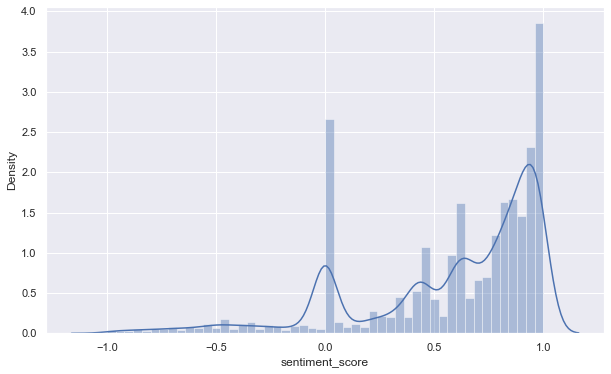

In [32]:
# Checking the distribution of reviews 

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(df['sentiment_score'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_score'>

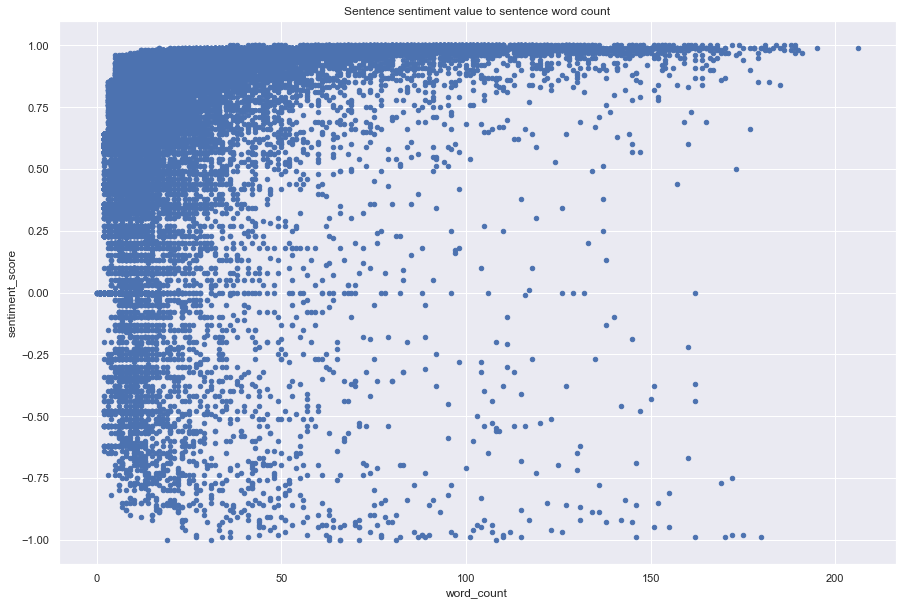

In [33]:
df.plot.scatter(x='word_count', y='sentiment_score', figsize=(15,10), title='Sentence sentiment value to sentence word count')

In [34]:
# This function will return sentiment category based on values in sentiment_value column

def sentiment_cat(row):
    
    '''This function returns sentiment category based on values in sentiment_value column'''
    
    if row['sentiment_score'] < 0:
        val = 'Negative'
    elif row['sentiment_score'] == 0: 
        val = 'Neutral'
    elif row['sentiment_score'] > 0:
        val = 'Positive'
    else:
        val = -1
    return val

In [35]:
#Applying the function in our new column
df['sentiment_category'] = df.apply(sentiment_cat, axis=1)
df.head()

,Ratings,Reviews,label,pre_process,sentiment_score,word_count,sentiment_category
0,5,These are still going strong after 3 months of...,1,still going strong month use find solar produc...,-0.05,16,Negative
1,5,Hey! you know that Chance scouted out the loca...,1,hey know chance scouted location canyon havein...,1.00,127,Positive
2,5,All moving pieces work as intended. The pieces...,1,moving piece work intended piece sturdy keep m...,0.00,10,Neutral
3,3,This book made me want to read more. I loved ...,1,book made want read loved would recommend iti ...,0.99,43,Positive
4,5,This book was so very excellent. To see what D...,1,book excellent see dream able push amazing alo...,0.97,31,Positive


In [36]:
df['sentiment_category'].value_counts()

Positive    24465
Neutral      3075
Negative     2132
Name: sentiment_category, dtype: int64

In [37]:
# Maximum sentiment value
df['sentiment_score'].max()

1.0

In [58]:
# review which is having max sentiment value
top_2 = df[df['sentiment_score']==1.0].head(2)

In [59]:
top_2

,Ratings,Reviews,label,pre_process,sentiment_score,word_count,sentiment_category
1,5,Hey! you know that Chance scouted out the loca...,1,hey know chance scouted location canyon havein...,1.0,127,Positive
77,5,I have always loved Melissa & Doug because of ...,1,always loved melissa doug outstanding quality ...,1.0,147,Positive


In [39]:
# minimum sentiment value
df['sentiment_score'].min()

-1.0

In [60]:
# review which is having min sentiment value
bottom_2 = df[df['sentiment_score']==-0.99]

In [61]:
bottom_2.head(2)

,Ratings,Reviews,label,pre_process,sentiment_score,word_count,sentiment_category
647,4,This is a long 2 part story. It appears to be ...,1,long part story appears made canadian tv sex n...,-0.99,180,Negative
701,4,This movie is a documentary on the lives of th...,1,movie documentary life family people victim wa...,-0.99,63,Negative


In [62]:
top_2_and_bottom_2_reviews=top_2.append(bottom_2.head(2))

In [63]:
top_2_and_bottom_2_reviews

,Ratings,Reviews,label,pre_process,sentiment_score,word_count,sentiment_category
1,5,Hey! you know that Chance scouted out the loca...,1,hey know chance scouted location canyon havein...,1.00,127,Positive
77,5,I have always loved Melissa & Doug because of ...,1,always loved melissa doug outstanding quality ...,1.00,147,Positive
647,4,This is a long 2 part story. It appears to be ...,1,long part story appears made canadian tv sex n...,-0.99,180,Negative
701,4,This movie is a documentary on the lives of th...,1,movie documentary life family people victim wa...,-0.99,63,Negative


In [65]:
top_2_and_bottom_2_reviews.to_csv("C:\\Users\\HP\\Downloads\\top_2_bottom_2_reviews.csv")

In [41]:
# Sentiment score of the whole review
df['sentiment_score'].describe()

count    29672.000000
mean         0.581167
std          0.424102
min         -1.000000
25%          0.420000
50%          0.740000
75%          0.910000
max          1.000000
Name: sentiment_score, dtype: float64

In [117]:
# pickling the model
import pickle
!pip install joblib
import joblib
pickle_out = open("model_sentiment.pkl","wb")
pickle_out=joblib.dump(X,pickle_out)
pickle_out
#pickle.dump(df,open("model.pkl","wb"))
#model = pickle.load(open("model.pkl","rb"))
